In [5]:
import tensorflow as tf
from tensorflow import keras

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
import random
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from PIL import Image
import pickle
# import cv2
from sklearn.model_selection import train_test_split
# from imblearn.under_sampling import RandomUnderSampler
import os
from PIL import Image
import numpy as np


# Libraries for model creation

# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
# from keras.utils.np_utils import to_categorical
# from keras.optimizers import Adam, SGD, Adagrad



# Scikit Learn Libraries
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

# Classification Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix

In [3]:
import tensorflow as tf
print("Num of GPUs available: ", len(tf.test.gpu_device_name()))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_13856\2601924346.py", line 1, in <module>
    import tensorflow as tf
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\__init__.py", line 41, in <module>
    from tensorflow.python.tools import module_util as _module_util
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\__init__.py", line 40, in <module>
    from tensorflow.python.eager import context
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\eager\context.py", line 33, in <module>
    from tensorflow.core.protobuf import config_pb2
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\core\protobuf\config_pb2.py", line 1494, in <mod

In [ ]:
# check status of NVIDIA GPU on the system
!nvidia-smi

In [ ]:
print(tf.__version__)

In [ ]:
tf.test.gpu_device_name()

In [ ]:
gpus = tf.config.list_physical_devices('GPU')

In [ ]:
!pip install tensorflow-gpu

In [98]:
# checks to see if GPU is present
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Please install GPU version of TF


# Data Preparation and Cleaning

In [23]:
# Read the CSV file into a pandas DataFrame
df_training = pd.read_csv(r'D:\Cancer Dataset (Delete Later)\Train\ISIC_2020_Training_GroundTruth.csv')

In [33]:
df_training['image_name'] = df_training['image_name'].apply(lambda x: x + '.jpg')

In [24]:
df_training.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [25]:
# drop irrelevant features
df_training.drop(["patient_id", "diagnosis", "sex", "age_approx", "anatom_site_general_challenge", "benign_malignant"], axis=1, inplace=True)

In [35]:
df_training.head()

,image_name
0,ISIC_2637011.jpg
1,ISIC_0015719.jpg
2,ISIC_0052212.jpg
3,ISIC_0068279.jpg
4,ISIC_0074268.jpg


In [27]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  33126 non-null  object
 1   target      33126 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 517.7+ KB


In [28]:
# Extract the values from a specific column into a numpy array
train_y = df_training['target']
df_training = df_training.drop('target', axis=1)

In [34]:
df_training.head()

,image_name
0,ISIC_2637011.jpg
1,ISIC_0015719.jpg
2,ISIC_0052212.jpg
3,ISIC_0068279.jpg
4,ISIC_0074268.jpg


In [37]:
und_sampler = RandomUnderSampler(random_state = 42)

resampled_x, resampled_y = und_sampler.fit_resample(df_training, train_y)

In [38]:
resampled_df = pd.concat([resampled_x, resampled_y], axis=1)

In [42]:
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  1168 non-null   object
 1   target      1168 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.4+ KB


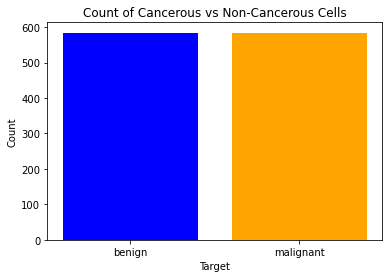

In [44]:
# separate the target column into two dataframes
zeros =resampled_df.loc[resampled_df['target'] == 0]
ones = resampled_df.loc[resampled_df['target'] == 1]

# get the count of each dataframe
zero_count = len(zeros)
one_count = len(ones)

colors = ['blue', 'orange']

# create a bar plot of the counts
plt.bar(['benign', 'malignant'], [zero_count, one_count], color=colors)
plt.title('Count of Cancerous vs Non-Cancerous Cells')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Load Resampled Dataframe Images 

In [51]:
directory = r'D:\Cancer Dataset (Delete Later)\Train\train'

# create an empty array to store the images
image_array = []

for index, row in resampled_df.iterrows():
    image_name = row['image_name']
    # load the image and resize it to the desired size
    img = Image.open(os.path.join(directory, image_name))
    img = img.resize((32,32))
    # convert the image to a numpy array and append it to the image array
    img_array = np.array(img)
    image_array.append(img_array)
    

In [56]:
len(image_array)

1168

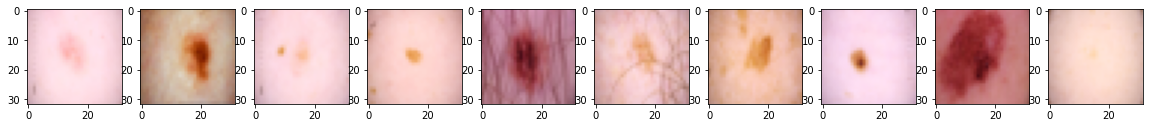

In [57]:
import matplotlib.pyplot as plt

# display the first 10 images from the image array
num_images = 10
fig, axs = plt.subplots(1, num_images, figsize=(20, 20))
for i in range(num_images):
    axs[i].imshow(image_array[i])
plt.show()


In [58]:
# Extract the values from a specific column into a numpy array
train_y = resampled_df['target'].values

In [59]:
len(train_y)

1168

Pixels values of image:  [[[0.82745098 0.67058824 0.7254902 ]
  [0.8627451  0.70588235 0.74901961]
  [0.89019608 0.72941176 0.77254902]
  ...
  [0.91372549 0.77254902 0.81176471]
  [0.88627451 0.7372549  0.77647059]
  [0.85490196 0.70588235 0.75686275]]

 [[0.84313725 0.69019608 0.7372549 ]
  [0.87843137 0.7254902  0.77254902]
  [0.90196078 0.74901961 0.79215686]
  ...
  [0.92156863 0.78039216 0.81960784]
  [0.89019608 0.74117647 0.78039216]
  [0.87058824 0.72156863 0.76862745]]

 [[0.85490196 0.70196078 0.74117647]
  [0.89019608 0.7372549  0.78039216]
  [0.91372549 0.76470588 0.81176471]
  ...
  [0.93333333 0.79215686 0.83137255]
  [0.90588235 0.76078431 0.80392157]
  [0.88627451 0.7372549  0.78039216]]

 ...

 [[0.80784314 0.66666667 0.70588235]
  [0.83921569 0.69803922 0.7254902 ]
  [0.87843137 0.7372549  0.77254902]
  ...
  [0.90980392 0.76470588 0.8       ]
  [0.88235294 0.7372549  0.77254902]
  [0.85490196 0.70980392 0.74901961]]

 [[0.78431373 0.65098039 0.68627451]
  [0.8274509

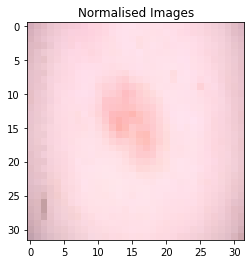

In [60]:
# Normalise images
def Normalise(img):
  norm = img/255  
  return norm

# Pass each image in the set into the function
train_x = np.array([Normalise(img) for img in image_array])

# Display image info
plt.imshow(train_x[0])
plt.title('Normalised Images')

print("Pixels values of image: " ,train_x[0])

print("Type of image: " ,train_x[0].dtype)

print("Min and Max value of image: ", train_x.min(), train_x.max())

In [61]:
# Split data into training and validation sets
train_x_split, val_x_split, train_y_split, val_y_split = train_test_split(train_x, train_y, test_size=0.2, random_state=25)

In [62]:
print(f"No. of train_x: {len(train_x_split)}")
print(f"No. of train_y: {len(train_y_split)}")
print(f"No. of val_x: {len(val_x_split)}")
print(f"No. of val_y: {len(val_y_split)}")

No. of train_x: 934
No. of train_y: 934
No. of val_x: 234
No. of val_y: 234


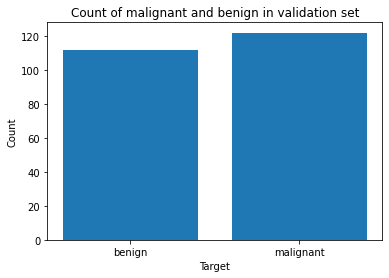

In [63]:
# Separate the 0s and 1s into different arrays
zeros = val_y_split[val_y_split == 0]
ones = val_y_split[val_y_split == 1]

# Get the count of each array
zero_count = len(zeros)
one_count = len(ones)

# Plot a bar chart of the counts
plt.bar(['benign', 'malignant'], [zero_count, one_count])
plt.title('Count of malignant and benign in validation set')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [64]:
# save datasets as pickle file
with open('val_resamp_x.pkl','wb') as f:
    pickle.dump(val_x_split, f)
with open('val_resamp_y.pkl','wb') as f:
    pickle.dump(val_y_split, f)

with open('train_resamp_x.pkl','wb') as f:
    pickle.dump(train_x_split, f)
with open('train_resamp_y.pkl','wb') as f:
    pickle.dump(train_y_split, f)

# Import Additional Dataset

In [1]:
import os
from PIL import Image
import numpy as np

directory = r'D:\Cancer Dataset (Delete Later)\Train\ISIC_2019_Training_Input'

# create an empty array to store the images
train_x_2 = []

# iterate over all files in the directory
for file in os.listdir(directory):
    if file.endswith('.jpg'):  # check if the file is a jpg image
        # load the image and resize it to the desired size
        img = Image.open(os.path.join(directory, file))
        img = img.resize((32,32))
        # convert the image to a numpy array and append it to the image array
        img_array = np.array(img)
        train_x_2.append(img_array)

# convert the image array to a numpy array
train_x_2 = np.array(train_x_2)

In [34]:
len(train_x_2)

25331

In [35]:
train_x_2.shape

(25331, 32, 32, 3)

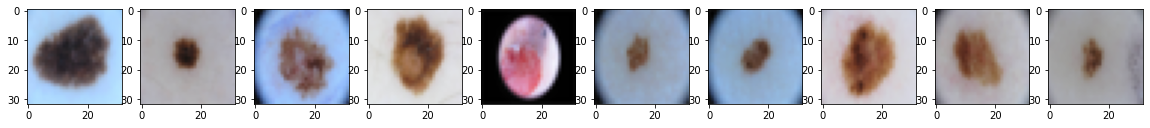

In [36]:
import matplotlib.pyplot as plt

# display the first 10 images from the image array
num_images = 10
fig, axs = plt.subplots(1, num_images, figsize=(20, 20))
for i in range(num_images):
    axs[i].imshow(train_x_2[i])
plt.show()


In [37]:
# Read the CSV file into a pandas DataFrame
df_2 = pd.read_csv(r'D:\Cancer Dataset (Delete Later)\Train\ISIC_2019_Training_GroundTruth.csv')

# Extract the values from a specific column into a numpy array
train_y_2 = df_2['MEL'].values

In [38]:
len(train_y_2)

25331

In [39]:
train_y_2.shape

(25331,)

## Visualise additional dataset target distribution

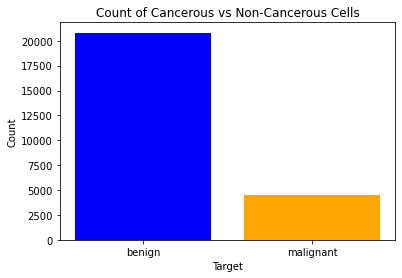

20809
4522


In [51]:
# separate the target column into two dataframes
zeros = train_y_2[train_y_2== 0]
ones = train_y_2[train_y_2 == 1]

# get the count of each dataframe
zero_count = len(zeros)
one_count = len(ones)

colors = ['blue', 'orange']

# create a bar plot of the counts
plt.bar(['benign', 'malignant'], [zero_count, one_count], color=colors)
plt.title('Count of Cancerous vs Non-Cancerous Cells')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

print(zero_count)
print(one_count)

## Concat two datasets

In [42]:
def pickle_to_set(setName):
    with open(setName,'rb') as f:
        set = pickle.load(f)
    print("dataset has been imported :)")
    return set

In [43]:
train_x_1 = pickle_to_set('./train_split_x_v2.pkl')
train_y_1 = pickle_to_set('./train_split_y_v2.pkl')

dataset has been imported :)
dataset has been imported :)


In [44]:
train_x_1.shape

(26500, 32, 32, 3)

In [45]:
train_y_1.shape

(26500,)

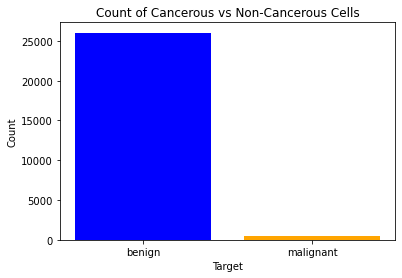

26035
465


In [52]:
# separate the target column into two dataframes
zeros = train_y_1[train_y_1 == 0]
ones = train_y_1[train_y_1 == 1]

# get the count of each dataframe
zero_count = len(zeros)
one_count = len(ones)

colors = ['blue', 'orange']

# create a bar plot of the counts
plt.bar(['benign', 'malignant'], [zero_count, one_count], color=colors)
plt.title('Count of Cancerous vs Non-Cancerous Cells')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

print(zero_count)
print(one_count)

In [48]:
trainx_concat = np.concatenate((train_x_1, train_x_2))
trainy_concat = np.concatenate((train_y_1, train_y_2))

## Visualise new target distribution

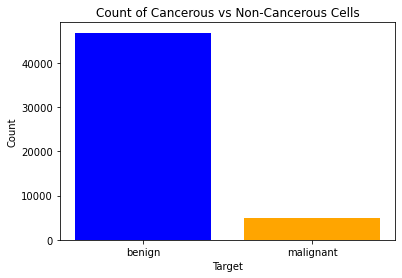

46844
4987


In [53]:
# separate the target column into two dataframes
zeros = trainy_concat[trainy_concat == 0]
ones = trainy_concat[trainy_concat == 1]

# get the count of each dataframe
zero_count = len(zeros)
one_count = len(ones)

colors = ['blue', 'orange']

# create a bar plot of the counts
plt.bar(['benign', 'malignant'], [zero_count, one_count], color=colors)
plt.title('Count of Cancerous vs Non-Cancerous Cells')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

print(zero_count)
print(one_count)

In [50]:
print(trainx_concat.shape)
print(trainy_concat.shape)

(51831, 32, 32, 3)
(51831,)


In [55]:
with open('train_x_concat.pkl','wb') as f:
    pickle.dump(trainx_concat, f)
with open('train_y_concat.pkl','wb') as f:
    pickle.dump(trainy_concat, f)

## Export dataset

# Grayscale and Normalise Images

Pixels values of image:  [[[163 105  77]
  [170 112  86]
  [177 113  79]
  ...
  [193 144 112]
  [182 131  95]
  [174 123  93]]

 [[168 111  83]
  [175 116  88]
  [180 116  82]
  ...
  [198 150 120]
  [190 141 111]
  [179 129  98]]

 [[173 116  90]
  [179 121  92]
  [185 123  90]
  ...
  [202 155 127]
  [193 143 114]
  [185 135 105]]

 ...

 [[155 103  86]
  [165 110  86]
  [169 115  84]
  ...
  [194 150 126]
  [186 141 118]
  [174 127 103]]

 [[145  96  78]
  [152  97  67]
  [163 107  71]
  ...
  [188 143 113]
  [181 137 114]
  [169 123 101]]

 [[140  93  75]
  [144  93  63]
  [153  97  61]
  ...
  [182 137 107]
  [176 132 109]
  [164 120  99]]]
Type of image:  uint8
Min and Max value of image:  0 255


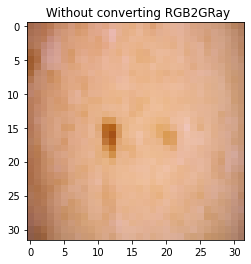

In [49]:
# Display image info
plt.imshow(image_array[0], cmap='gray')
plt.title(' Without converting RGB2GRay')

print("Pixels values of image: " ,image_array[0])

print("Type of image: " ,image_array[0].dtype)

print("Min and Max value of image: ", image_array.min(), image_array.max())

Pixels values of image:  [[0.01568627 0.02745098 0.03137255 ... 0.13333333 0.07843137 0.0627451 ]
 [0.02352941 0.03921569 0.04313725 ... 0.18039216 0.11764706 0.0745098 ]
 [0.03921569 0.0627451  0.07058824 ... 0.23921569 0.13333333 0.09411765]
 ...
 [0.01176471 0.01960784 0.03137255 ... 0.16862745 0.11764706 0.07058824]
 [0.00392157 0.00784314 0.01568627 ... 0.1254902  0.09803922 0.05490196]
 [0.         0.         0.00784314 ... 0.09411765 0.07843137 0.04313725]]
Type of image:  float64
Min and Max value of image:  0.0 1.0


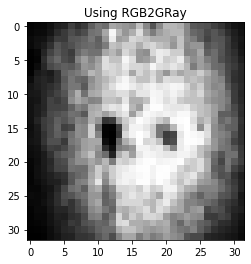

In [46]:
# Turning images to rgb2gray grayscale and using histogram equalization

# Convert to Grayscale using RGB2GRAY
# 24-bit format with R0 G0 B0 R1 B1 G1 layout
def setGrayAndNormalise(img):
  norm = img/255  
  return norm

# Pass each image in the set into the function
train_x_rgb2gray = np.array([setGrayAndNormalise(img) for img in image_array])

# Display image info
plt.imshow(train_x_rgb2gray[0])
plt.title('Using RGB2GRay')

print("Pixels values of image: " ,train_x_rgb2gray[0])

print("Type of image: " ,train_x_rgb2gray[0].dtype)

print("Min and Max value of image: ", train_x_rgb2gray.min(), train_x_rgb2gray.max())

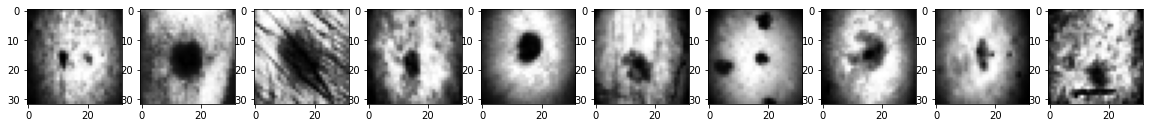

In [51]:
# display the first 10 images from the image array
num_images = 10
fig, axs = plt.subplots(1, num_images, figsize=(20, 20))
for i in range(num_images):
    axs[i].imshow(train_x_rgb2gray[i], cmap='gray')
plt.show()


In [47]:
with open('train_x_rgb2gray.pkl','wb') as f:
    pickle.dump(train_x_rgb2gray, f)

In [103]:
with open('train_y.pkl','wb') as f:
    pickle.dump(train_y, f)

In [54]:
print(f"No. of train_x: {len(train_x_split)}")
print(f"No. of train_y: {len(train_y_split)}")
print(f"No. of val_x: {len(val_x_split)}")
print(f"No. of val_y: {len(val_y_split)}")

No. of train_x: 26500
No. of train_y: 26500
No. of val_x: 6626
No. of val_y: 6626


# Split non-grayscale images

In [106]:
train_x = pickle_to_set('./train_x.pkl')
train_y = pickle_to_set('./train_y.pkl')

dataset has been imported :)
dataset has been imported :)


In [107]:
from sklearn.model_selection import train_test_split
# Split data into training and validation sets
train_x_split, val_x_split, train_y_split, val_y_split = train_test_split(train_x, train_y, test_size=0.2, random_state=25)

In [108]:
# save datasets as pickle file
with open('val_split_x_v2.pkl','wb') as f:
    pickle.dump(val_x_split, f)
with open('val_split_y_v2.pkl','wb') as f:
    pickle.dump(val_y_split, f)

with open('train_split_x_v2.pkl','wb') as f:
    pickle.dump(train_x_split, f)
with open('train_split_y_v2.pkl','wb') as f:
    pickle.dump(train_y_split, f)

# Model Evaluation

## Helper Functions

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss='mse')
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=10, batch_size=1, callbacks=[callback],
                    verbose=0)
len(history.history['loss'])  # Only 4 epochs are run.



In [75]:
def compile_and_train(train_x, train_y, val_x, val_y):
    # Declare training parameters
    learning_rate = 0.001
    epoch = 10
    batch_size =32
    
    # This callback will stop the training when there is no improvement in
    # the loss for three consecutive epochs.
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    
    # Train Model
    history = model.fit(train_x, y_train, batch_size= batch_size, epochs=epoch,
                   validation_data= (val_x, y_val), callbacks=[callback])
    
    # Display Accuracy and Loss values of Training and Validation data

    plt.figure(0)
    plt.plot(history.history['acc'], label='training accuracy')
    plt.plot(history.history['val_acc'], label='val accuracy')
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()

    plt.figure(1)
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()

In [12]:
def ClassificationReport(y_pred, y_true):
    return classification_report(y_true,y_pred)

In [20]:
def plotConfusionMAatrix(y_pred, y_true):
    # create confusion matrix
    conf_mat = confusion_matrix(y_true, y_pred)

    # plot confusion matrix
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [14]:
def plotROC(y_pred, y_true):
    # Calculate the false positive rate (fpr), true positive rate (tpr), and threshold values
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)

    # Calculate the area under the curve (AUC) of the ROC curve
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [69]:
def F1score(y_pred, y_true):
    f1Score= f1_score(y_pred, y_true, average=None)
    return f1Score

In [70]:
def AUC(y_pred, y_true):
    # Calculate the false positive rate (fpr), true positive rate (tpr), and threshold values
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)

    # Calculate the area under the curve (AUC) of the ROC curve
    roc_auc = auc(fpr, tpr)
    return roc_auc

## Import Models

In [152]:
# Import Custom models
model_CNN_new = keras.models.load_model('CNN_new.h5')
model_CNN_new_aug = keras.models.load_model('CNN_new_aug.h5')
model_CNN_new_img_gen = keras.models.load_model('CNN_new_img_gen.h5')
model_CNN_new_tuned = keras.models.load_model('CNN_new_tuned.h5')

# Import pre-trained model
model_vgg16_new = keras.models.load_model('VGG-16_new.h5')



## Import Test Set

In [7]:
def pickle_to_set(setName):

    with open(setName,'rb') as f:

        set = pickle.load(f)

    print("dataset has been imported :)")

    return set

test_x = pickle_to_set('./test_x.pkl')
test_y = pickle_to_set('./test_y.pkl')

dataset has been imported :)
dataset has been imported :)


In [132]:
len(test_x)

1512

## Results with CNN model

In [153]:
# Make predictions on the test data
predictions = model_CNN_new_tuned.predict((test_x))
prediction_labels = np.round(predictions)



<Axes: >

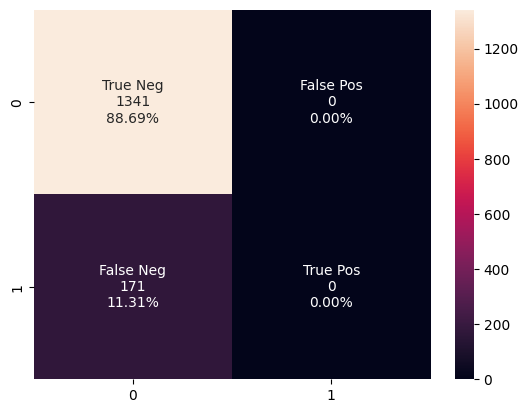

In [154]:
cm = confusion_matrix(test_y, prediction_labels)

# cm_display = ConfusionMatrixDisplay(cm).plot()

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                    cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='')

In [155]:
print(F1score(prediction_labels, test_y))

[0.94006309 0.        ]


In [156]:
# Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_y, prediction_labels)*100)

Test Data accuracy:  88.69047619047619


In [157]:
print(AUC(prediction_labels, test_y))

0.5


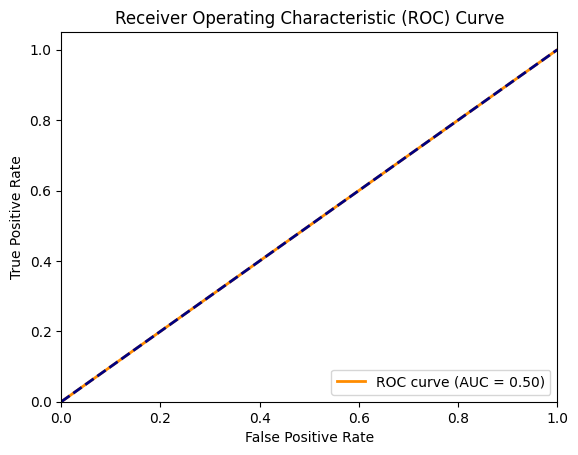

In [158]:
plotROC(prediction_labels, test_y)

In [101]:
print(f"True Negatives : {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives : {tp}")

True Negatives : 607
False Positives: 1329
False Negatives: 1107
True Positives : 470


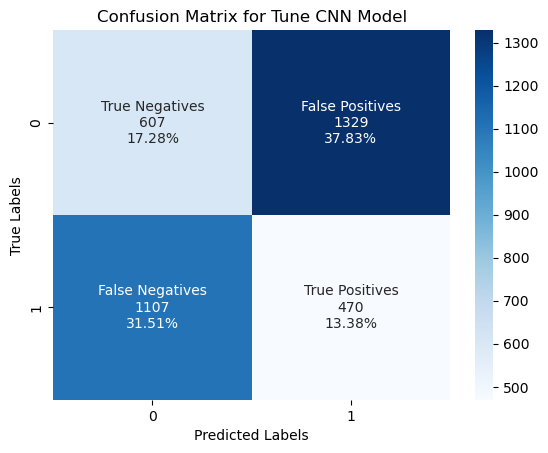

In [102]:
# Create a 2x2 numpy array for the confusion matrix
conf_matrix = np.array([[tn, fp], [fn, tp]])

# set group names
group_names = ['True Negatives','False Positives','False Negatives','True Positives']

# create labels with counts and percentages
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in (conf_matrix / np.sum(conf_matrix)).flatten()]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# create heatmap
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

# add title and axis labels
plt.title('Confusion Matrix for Tune CNN Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# show plot
plt.show()
